In [25]:

# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [51]:
!pwd

/home/lab/dev/rl_vdo/RL-WebRtc/Experiment


In [59]:
!ls traces

dynamic_700k  gcc.csv  hrcc.csv  rl.csv  static_700k


In [154]:
bw = [400000] * 500

In [134]:
trace_file = '/home/lab/dev/rl_vdo/RL-WebRtc/Demo/4G_400k_Trace.txt'
f = open(trace_file, 'r')

# add each line of the file to the bw_items list
# each line should contain a numeric value representing bandwidth in kb
# otherwise modify the tc command below
with open(trace_file, 'r') as inputFile:
    bw_items = [int(line.rstrip())*1000 for line in inputFile]


In [156]:
np.mean(bw_items)

426250.36496350367

In [158]:
np.std(bw_items)

213724.5739772678

In [159]:
np.max(bw_items)

1016000

In [175]:
gcc = pd.read_csv('traces/testbed/gcc.csv',names=('est_rate','recv_rate','delay','loss'))


In [162]:
def read_traces(path):
# Read CSV file into DataFrame df
    hrcc = pd.read_csv('traces/'+path+'/hrcc.csv',names=('est_rate','recv_rate','delay','loss'))
    gcc = pd.read_csv('traces/'+path+'/gcc.csv',names=('est_rate','recv_rate','delay','loss'))
    rl = pd.read_csv('traces/'+path+'/rl.csv',names=('est_rate','recv_rate','delay','loss'))
    return gcc,rl,hrcc

def plot_time(env):
    window = 1
    plt.figure(figsize=(12, 5))
    plt.plot(env[0]['est_rate'].rolling(window).mean(), label='gcc')  # Plot some data on the (implicit) axes.
    plt.plot(env[1]['est_rate'].rolling(window).mean(), label='rl')  # Plot some data on the (implicit) axes.
    plt.plot(env[2]['est_rate'].rolling(window).mean(), label='hrcc')  # Plot some data on the (implicit) axes.
    plt.plot(bw, label='Max Bandwidth')  # Plot some data on the (implicit) axes.

    plt.xlabel('Steps')
    plt.ylabel('est_rate')
    # plt.title("Simple Plot")
    plt.legend(fontsize='x-large')
    
    plt.figure(figsize=(12, 5))
    plt.plot(env[0]['recv_rate'].rolling(window).mean(), label='gcc')  # Plot some data on the (implicit) axes.
    plt.plot(env[1]['recv_rate'].rolling(window).mean(), label='rl')  # Plot some data on the (implicit) axes.
    plt.plot(env[2]['recv_rate'].rolling(window).mean(), label='hrcc')  # Plot some data on the (implicit) axes.
    plt.plot(bw, label='Max Bandwidth')  # Plot some data on the (implicit) axes.

    plt.xlabel('Steps')
    plt.ylabel('Received bitrate')
    # plt.title("Simple Plot")
    plt.legend(fontsize='x-large')

In [23]:
hrcc_rate_mbps = hrcc['rate']/ 1000000
gcc_rate_mbps = gcc['rate']/ 1000000
rl_rate_mbps = rl['rate']/ 1000000

In [72]:
static_700 = read_traces('static_700k')
dynamic_700 = read_traces('dynamic_700k')

In [138]:
static_400 = read_traces('static_400k')
dynamic_400 = read_traces('dynamic_400k')

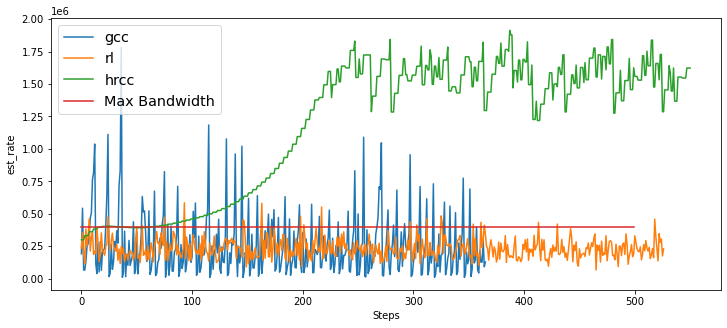

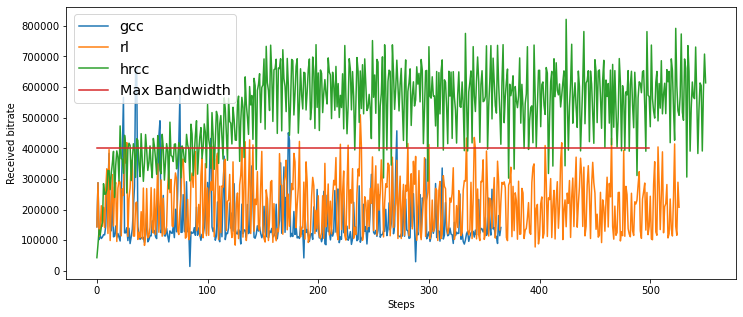

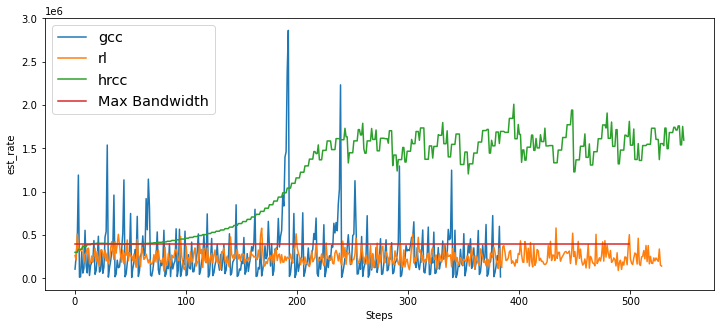

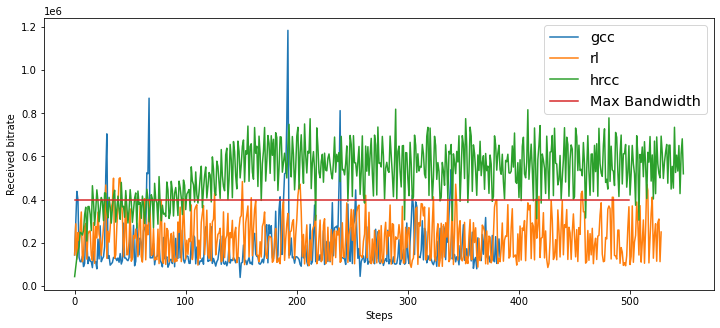

In [163]:
plot_time(dynamic_400)
plot_time(static_400)

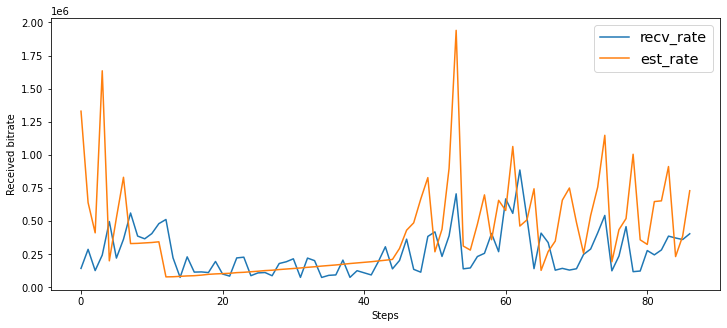

In [181]:
plt.figure(figsize=(12, 5))
plt.plot(gcc['recv_rate'][:], label='recv_rate')  # Plot some data on the (implicit) axes.
plt.plot(gcc['est_rate'][:], label='est_rate')  # Plot some data on the (implicit) axes.

plt.xlabel('Steps')
plt.ylabel('Received bitrate')
# plt.title("Simple Plot")
plt.legend(fontsize='x-large')

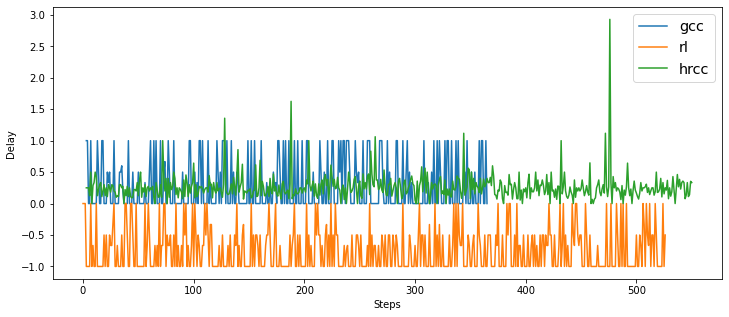

In [174]:
plt.figure(figsize=(12, 5))
plt.plot(dynamic_400[0]['delay'][3:], label='gcc')  # Plot some data on the (implicit) axes.
plt.plot(dynamic_400[1]['delay'], label='rl')  # Plot some data on the (implicit) axes.
plt.plot(dynamic_400[2]['delay'][3:], label='hrcc')  # Plot some data on the (implicit) axes.

plt.xlabel('Steps')
plt.ylabel('Delay ')
# plt.title("Simple Plot")
plt.legend(fontsize='x-large')

Text(0, 0.5, 'Received bitrate (Mbps)')

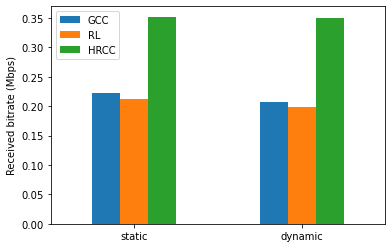

In [87]:
gcc = [static_700[0]['recv_rate'].mean()/1000000, dynamic_700[0]['recv_rate'].mean()/1000000]
rl = [static_700[1]['recv_rate'].mean()/1000000, dynamic_700[1]['recv_rate'].mean()/1000000]
hrcc = [static_700[2]['recv_rate'].mean()/1000000, dynamic_700[2]['recv_rate'].mean()/1000000]

index = ['static' , 'dynamic']
df = pd.DataFrame({'GCC': gcc,
                    'RL': rl,
                      'HRCC' : hrcc
                  }, index=index)
ax = df.plot.bar(rot=0)
plt.ylabel('Received bitrate (Mbps)')


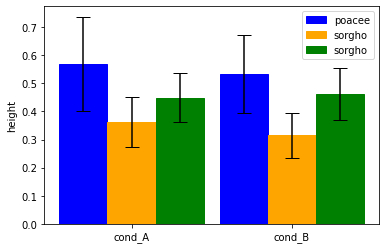

In [131]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [10, 9, 2]
 
# Choose the height of the cyan bars
bars2 = [10.8, 9.5, 4.5]
 
bars3 = [10.8, 9.5, 4.5]

gcc_std = [static_700[0]['recv_rate'].std()/1000000, dynamic_700[0]['recv_rate'].std()/1000000]
rl_std = [static_700[1]['recv_rate'].std()/1000000, dynamic_700[1]['recv_rate'].std()/1000000]
hrcc_std = [static_700[2]['recv_rate'].std()/1000000, dynamic_700[2]['recv_rate'].std()/1000000]

# Choose the height of the error bars (bars1)
yer1 = [0.5, 0.4]
 
# Choose the height of the error bars (bars2)
yer2 = [1, 0.7]
 
# The x position of bars
r1 = np.arange(len(gcc))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth*2 for x in r1]

# Create blue bars
plt.bar(r1, gcc, width = barWidth, color = 'blue', edgecolor = 'blue', yerr=gcc_std, capsize=7, label='poacee')
 
# Create cyan bars
plt.bar(r2, rl, width = barWidth, color = 'orange', edgecolor = 'orange', yerr=rl_std, capsize=7, label='sorgho')
 
plt.bar(r3, hrcc, width = barWidth, color = 'green', edgecolor = 'green', yerr=hrcc_std, capsize=7, label='sorgho')

# general layout
plt.xticks([r + barWidth for r in range(len(gcc))], ['cond_A', 'cond_B'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

In [109]:
static_700[0]['recv_rate'].median()

140400.0

Text(0, 0.5, 'Received bitrate (Mbps)')

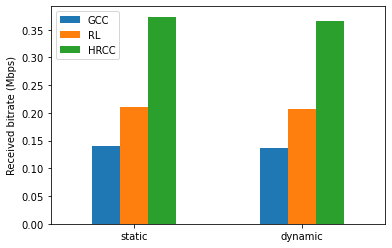

In [110]:
gcc = [static_700[0]['recv_rate'].median()/1000000, dynamic_700[0]['recv_rate'].median()/1000000]
rl = [static_700[1]['recv_rate'].median()/1000000, dynamic_700[1]['recv_rate'].median()/1000000]
hrcc = [static_700[2]['recv_rate'].median()/1000000, dynamic_700[2]['recv_rate'].median()/1000000]

index = ['static' , 'dynamic']
df = pd.DataFrame({'GCC': gcc,
                    'RL': rl,
                      'HRCC' : hrcc
                  }, index=index)
ax = df.plot.bar(rot=0)
plt.ylabel('Received bitrate (Mbps)')


Text(0, 0.5, 'Received bitrate (Mbps)')

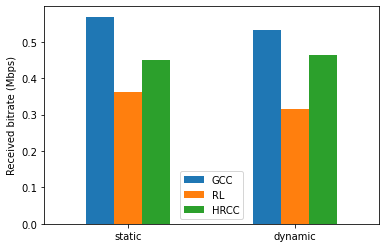

In [122]:
gcc = [np.percentile(static_700[0]['recv_rate']/1000000, 95)
, np.percentile(dynamic_700[0]['recv_rate']/1000000, 95)]
rl = [np.percentile(static_700[1]['recv_rate']/1000000, 95)
, np.percentile(dynamic_700[1]['recv_rate']/1000000, 95)]
hrcc = [np.percentile(static_700[2]['recv_rate']/1000000, 95)
, np.percentile(dynamic_700[2]['recv_rate']/1000000, 95)]

index = ['static' , 'dynamic']
df = pd.DataFrame({'GCC': gcc,
                    'RL': rl,
                      'HRCC' : hrcc
                  }, index=index)
ax = df.plot.bar(rot=0)
plt.ylabel('Received bitrate (Mbps)')


In [121]:
np.percentile(static_700[0]['recv_rate']/1000000, 95)

0.5687199999999998

In [82]:
static_700[0]['recv_rate'].mean()/1000000
static_700[1]['recv_rate'].mean()/1000000
static_700[2]['recv_rate'].mean()/1000000

0.3518769230769231

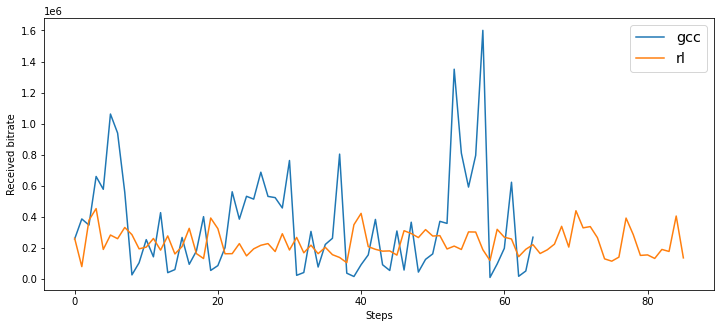

In [68]:
plt.figure(figsize=(12, 5))
plt.plot(static_700[0]['est_rate'], label='gcc')  # Plot some data on the (implicit) axes.
plt.plot(static_700[1]['est_rate'], label='rl')  # Plot some data on the (implicit) axes.
# plt.plot(static_700[2]['est_rate'], label='hrcc')  # Plot some data on the (implicit) axes.

plt.xlabel('Steps')
plt.ylabel('Received bitrate')
# plt.title("Simple Plot")
plt.legend(fontsize='x-large')

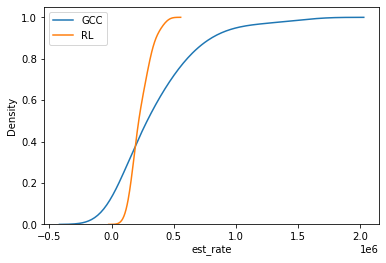

In [124]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

X1 = static_700[0]['est_rate']
X2 = static_700[1]['est_rate']
X3 = static_700[2]['est_rate']

sns.kdeplot(data = X1, cumulative = True, label = "GCC")
sns.kdeplot(data = X2, cumulative = True, label = "RL")
# sns.kdeplot(data = X3, cumulative = True, label = "X3")

plt.legend()
plt.show()

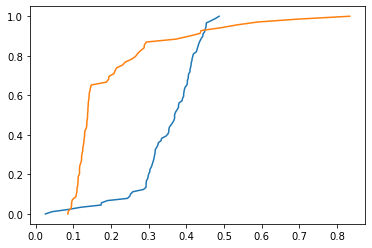

In [34]:
#calculate CDF values
x = np.sort(gcc[0])
y = 1. * np.arange(len(hrcc_rate_mbps)) / (len(hrcc_rate_mbps) - 1)

#plot CDF
plt.plot(x, y)
plt.plot(np.sort(gcc_rate_mbps), 1. * np.arange(len(gcc_rate_mbps)) / (len(gcc_rate_mbps) - 1))


<AxesSubplot:>

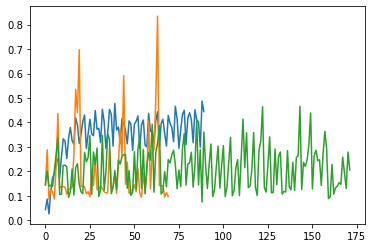

In [36]:
hrcc_rate_mbps.plot()
gcc_rate_mbps.plot()
rl_rate_mbps.plot()

<AxesSubplot:>

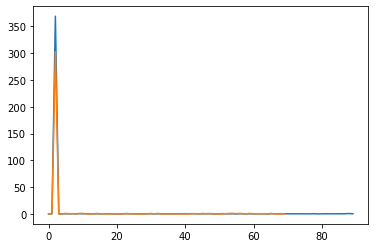

In [20]:
hrcc['delay'].plot()
gcc['delay'].plot()